# ACF & PACF

## Overview

```python
p, d, q = 1, 1, 3  # Non-seasonal parameters
P, D, Q, s = 1, 0, 3, 12  # Seasonal parameters

order = (p, d, q)
seasonal_order = (P, D, Q, s)

model = SARIMAX(series, order=order, seasonal_order=seasonal_order)
```

In [2]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/airline_passengers.csv"

In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 500px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>

<table class="custom-table">
    <thead>
        <tr>
            <th>ARIMA Model Parameters</th>
            <th>SARIMA Model Parameters</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <table>
                    <tr><th>Parameter</th><th>Abbreviation</th><th>Description</th><th>Correlation Plot Type</th></tr>
                    <tr><td>p</td><td>AR</td><td>Auto Regression Order</td><td>Partial Autocorrelation</td></tr>
                    <tr><td>d</td><td>-</td><td>Differencing Order</td><td>-</td></tr>
                    <tr><td>q</td><td>MA</td><td>Moving Average Order</td><td>Autocorrelation</td></tr>
                </table>
            </td>
            <td>
                <table>
                    <tr><th>Parameter</th><th>Abbreviation</th><th>Description</th><th>Correlation Plot Type</th></tr>
                    <tr><td>p</td><td>AR</td><td>Auto Regression Order</td><td>Partial Autocorrelation</td></tr>
                    <tr><td>d</td><td>-</td><td>Differencing Order</td><td>-</td></tr>
                    <tr><td>q</td><td>MA</td><td>Moving Average Order</td><td>Autocorrelation</td></tr>
                    <tr><td>P</td><td>SAR</td><td>Seasonal Auto Regression Order</td><td>Partial Autocorrelation</td></tr>
                    <tr><td>D</td><td>-</td><td>Seasonal Differencing Order</td><td>-</td></tr>
                    <tr><td>Q</td><td>SMA</td><td>Seasonal Moving Average Order</td><td>Autocorrelation</td></tr>
                    <tr><td>s</td><td>-</td><td>Seasonal Period (in time units)</td><td>-</td></tr>
                </table>
            </td>
        </tr>
    </tbody>
</table>

![](src/03_input.png)

In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

pd.options.plotting.backend = 'plotly'

#path = 'airline-passengers.csv'

df_passengers = pd.read_csv(path,
                            parse_dates=["Month"],
                            index_col="Month",
                            )

df_passengers = df_passengers.asfreq('MS')
df_passengers.columns = ['Passengers']
series = df_passengers.Passengers
series

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Check Stationarity & Seasonality

In [4]:
series.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller

adfuller(series)

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [6]:
series_dt1 = series.diff().dropna()
series_dt1.plot()

In [7]:
adfuller(series_dt1)

(-2.8292668241700047,
 0.05421329028382478,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [8]:
series_dt1_ds12 = series_dt1.diff(12).dropna()
series_dt1_ds12.plot()

In [9]:
adfuller(series_dt1_ds12)

(-15.595618083746338,
 1.856511600123444e-28,
 0,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 919.8428088960275)

## ACF & PACF

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

### ARIMA (p,d,q)

| Parameter | Abbreviation   | Description              | Correlation Plot Type  |
|-----------|----------------|--------------------------|------------------------|
| p         | AR | Auto Regression Order    | Partial Autocorrelation|
| d         | -              | Differencing Order       | -                      |
| q         | MA | Moving Average Order     | Autocorrelation        |

#### Partial Autocorrelation Plot for `p`

##### Calculation

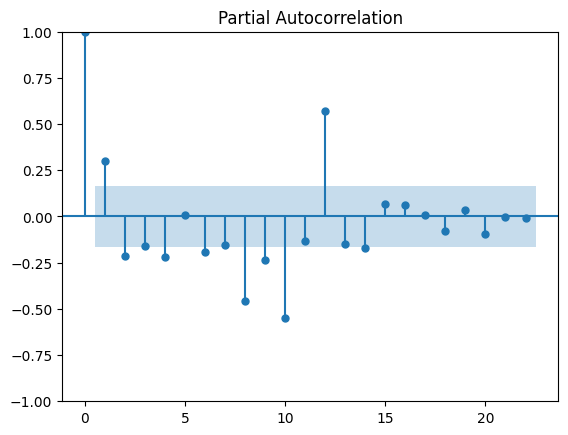

In [11]:
plot_pacf(series_dt1);

##### Model Application

```python
p = 2
d = 1 # differencing to make series stationary (ie, no trend)
q = ?

model = ARIMA(series, order=(p,d,q))
```

#### Autocorrelation Plot for `q`

##### Calculation

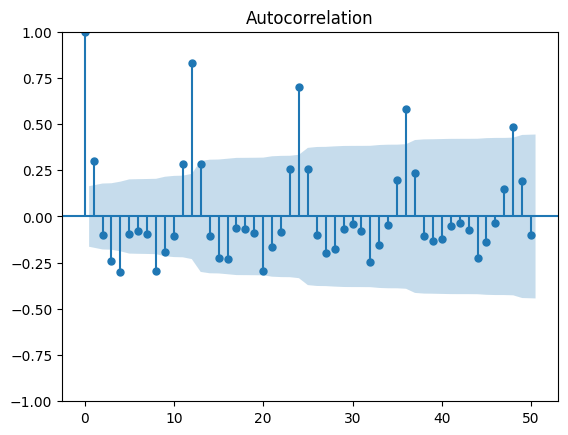

In [12]:
plot_acf(series_dt1, lags=50);

##### Model Application

In [13]:
p = 2
d = 1
q = 1

order = (p,d,q)

In [14]:
model = ARIMA(series, order=order)
model_fit = model.fit()

#### Manual Tuning

##### Analize Forecast

In [15]:
horizon = 48
y_pred = model_fit.forecast(horizon)
y_pred.head(5)

,predicted_mean
1961-01-01,471.000383
1961-02-01,492.998177
1961-03-01,497.918890
1961-04-01,492.528738
1961-05-01,484.243730


In [16]:
series.tail(5)

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [17]:
df_pred = series.to_frame()
df_pred

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [18]:
y_pred.name = f'Forecast {order}'
df_pred = pd.concat([df_pred, y_pred], axis=1)
df_pred

,Passengers,"Forecast (2, 1, 1)"
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN
...,...,...
1964-08-01,NaN,478.347157
1964-09-01,NaN,478.347156
1964-10-01,NaN,478.347159
1964-11-01,NaN,478.347161


In [19]:
df_pred.plot()

##### Compare with New Order

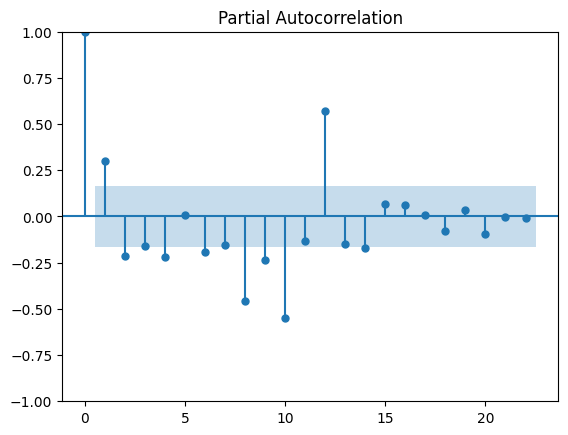

In [20]:
plot_pacf(series_dt1);

In [21]:
p = 12
d = 1
q = 1

order = (p,d,q)

model = ARIMA(series, order=order)
model_fit = model.fit()
model_fit

In [22]:
horizon = 48
y_pred = model_fit.forecast(horizon)
y_pred.name = f'Forecast {order}'

df_pred = pd.concat([df_pred, y_pred], axis=1)
df_pred

,Passengers,"Forecast (2, 1, 1)","Forecast (12, 1, 1)"
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN
...,...,...,...
1964-08-01,NaN,478.347157,651.327285
1964-09-01,NaN,478.347156,580.632572
1964-10-01,NaN,478.347159,520.323043
1964-11-01,NaN,478.347161,468.554187


In [23]:
df_pred.plot()

#### Comparing Different Numbers

In [24]:
def add_forecast_column(series, df_pred, horizon, order=(2,1,12)):

    model = ARIMA(series, order=order)
    model_fit = model.fit()

    y_pred = model_fit.forecast(horizon)

    column = f'Forecast {order}'
    y_pred.name = column
    df_pred = pd.concat([df_pred, y_pred], axis=1)

    return df_pred

##### `P` for Moving Average [MA] with ACF

- ARIMA (P,d,Q)
- ARIMA (MA,d,AR)
- ARIMA (ACF,d,PACF)

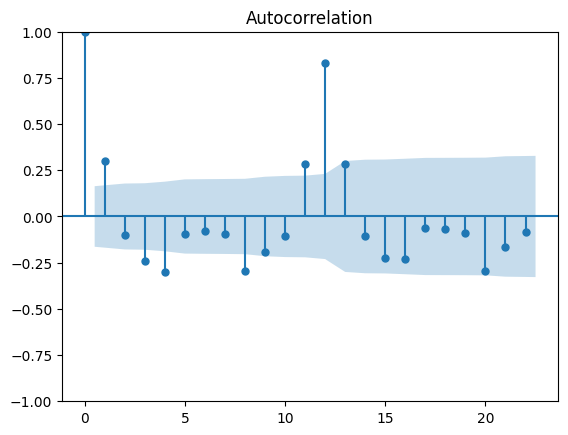

In [25]:
plot_acf(series_dt1);

In [26]:
df_pred = series.to_frame()

list_combo = [
    (12, 1, 1),
    (12, 1, 3),
    (12, 1, 4),
    (12, 1, 8),
    (12, 1, 11),
    (12, 1, 12)
]

for combo in list_combo:
    df_pred = add_forecast_column(series, df_pred, horizon=48, order=combo)

df_pred

,Passengers,"Forecast (12, 1, 1)","Forecast (12, 1, 3)","Forecast (12, 1, 4)","Forecast (12, 1, 8)","Forecast (12, 1, 11)","Forecast (12, 1, 12)"
1949-01-01,112.0,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN,NaN,NaN,NaN
1949-03-01,132.0,NaN,NaN,NaN,NaN,NaN,NaN
1949-04-01,129.0,NaN,NaN,NaN,NaN,NaN,NaN
1949-05-01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1964-08-01,NaN,651.327285,654.823792,663.778648,691.834146,680.052540,704.155874
1964-09-01,NaN,580.632572,577.159700,586.113581,610.709947,599.052655,616.770337
1964-10-01,NaN,520.323043,519.778943,529.101822,553.501464,541.921326,562.033679
1964-11-01,NaN,468.554187,473.800903,486.161415,510.377246,499.336673,514.462769


In [27]:
df_pred.plot()

##### `Q` for Auto Regression [AR] with PACF

- ARIMA (P,d,Q)
- ARIMA (MA,d,AR)
- ARIMA (ACF,d,PACF)

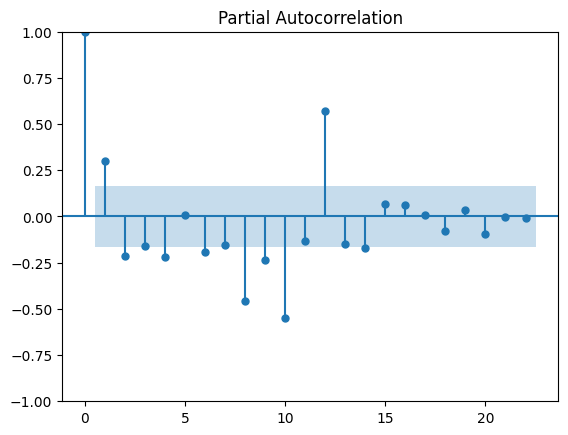

In [28]:
plot_pacf(series_dt1);

In [29]:
df_pred = series.to_frame()

list_combo = [
    (12,1,1),
    (1,1,1),
    (2,1,1),
    (3,1,1),
    (4,1,1),
    (8,1,1),
    (10,1,1),
]

for combo in list_combo:
    df_pred = add_forecast_column(series, df_pred, horizon=48, order=combo)

In [30]:
df_pred.plot()

### SARIMA (P,D,Q,s)

| Parameter | Abbreviation   | Description                     | Correlation Plot Type  |
|-----------|----------------|---------------------------------|------------------------|
| p         | AR | Auto Regression Order           | Partial Autocorrelation|
| d         | -              | Differencing Order              | -                      |
| q         | MA | Moving Average Order            | Autocorrelation        |
| P         | SAR | Seasonal Auto Regression Order   | Partial Autocorrelation|
| D         | -              | Seasonal Differencing Order     | -                      |
| Q         | SMA | Seasonal Moving Average Order   | Autocorrelation        |
| s         | -              | Seasonal Period (in time units) | -                      |

#### Manual Configuration

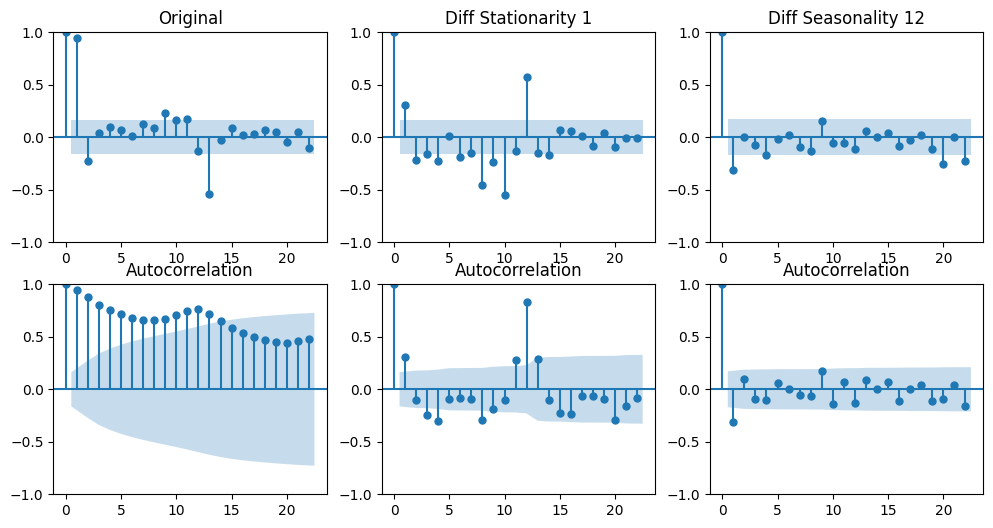

In [32]:
dict_series = {
    'Original': series,
    'Diff Stationarity 1': series_dt1,
    'Diff Seasonality 12': series_dt1_ds12
}

fig, axs = plt.subplots(2,3, figsize=(12,6))
for i, (name, s) in enumerate(dict_series.items()):
    plot_pacf(s, ax=axs[0,i]);
    plot_acf(s, ax=axs[1,i]);
    axs[0,i].set_title(name)

#plt.savefig('src/03_input.png', dpi=200)

In [34]:
p,d,q = 2,1,1
P,D,Q,s = 1,1,1,12

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (p, d, q)
seasonal_order = (P, D, Q, s)

model = SARIMAX(series, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

model_summary = model_fit.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -503.124
Date:                            Mon, 27 Jan 2025   AIC                           1018.248
Time:                                    13:21:31   BIC                           1035.499
Sample:                                01-01-1949   HQIC                          1025.258
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5800      0.096      6.035      0.000       0.392       0.768
ar.L2          0.2287      0.103      2.211      0.027       0.026       0.431
ma.L1         -0.9782      0.043    -22.646      0.000      -1.063      -0.894
ar.S.L12      -0.9028      0.245     -3.692      0.000      -1.382      -0.424
ma.S.L12       0.8119      0.334      2.428      0.015       0.156       1.467
sigma2       124.4784     13.839      8.995      0.000      97.355     151.602
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                11.02
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.60   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
df_pred = series.to_frame()
df_pred

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [38]:
horizon = 48
y_pred = model_fit.forecast(horizon)
y_pred.name = f'Forecast {order} {seasonal_order}'

In [39]:
df_pred = pd.concat([df_pred, y_pred], axis=1)
df_pred

,Passengers,"Forecast (2, 1, 1) (1, 1, 1, 12)"
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN
...,...,...
1964-08-01,NaN,750.136874
1964-09-01,NaN,652.832168
1964-10-01,NaN,605.517424
1964-11-01,NaN,534.996918


In [40]:
df_pred.plot()

#### Grid Search

In [44]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [45]:
p = q = range(1,5)
P = Q = range(1,5)
d = D = range(2)
s = 12  # Assuming yearly seasonality in monthly data

In [46]:
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(P, D, Q))]

In [47]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

In [48]:
seasonal_pdq

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 0, 4, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (1, 1, 4, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 0, 4, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (2, 1, 4, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 0, 4, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12),
 (3, 1, 4, 12),
 (4, 0, 1, 12),
 (4, 0, 2, 12),
 (4, 0, 3, 12),
 (4, 0, 4, 12),
 (4, 1, 1, 12),
 (4, 1, 2, 12),
 (4, 1, 3, 12),
 (4, 1, 4, 12)]

```python
from tqdm import tqdm_notebook

lowest_aic = float('inf')
best_pdq = best_seasonal_pdq = None

models = []

for param in tqdm_notebook(pdq):
    for param_seasonal in tqdm_notebook(seasonal_pdq):
        try:
            model = SARIMAX(series, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(maxiter=10_000)
            models.append([model, results.aic, param, param_seasonal])
            if results.aic < lowest_aic:
                lowest_aic = results.aic
                best_pdq, best_seasonal_pdq = param, param_seasonal
        except:
            continue
```

In [ ]:
df_grid = pd.read_csv('results.csv')
df_grid

,AIC,order,order_seasonal
0,989.176474,"(1, 0, 1)","(1, 0, 1, 12)"
1,909.473501,"(1, 0, 1)","(1, 0, 2, 12)"
2,3355.047504,"(1, 0, 1)","(1, 0, 3, 12)"
3,740.326502,"(1, 0, 1)","(1, 0, 4, 12)"
4,935.915286,"(1, 0, 1)","(1, 1, 1, 12)"
...,...,...,...
1019,705.074835,"(4, 1, 4)","(4, 0, 4, 12)"
1020,627.425807,"(4, 1, 4)","(4, 1, 1, 12)"
1021,632.690086,"(4, 1, 4)","(4, 1, 2, 12)"
1022,32.000000,"(4, 1, 4)","(4, 1, 3, 12)"


In [ ]:
df_grid.sort_values('AIC')

,AIC,order,order_seasonal
194,18.000000,"(1, 1, 3)","(1, 0, 3, 12)"
550,20.000000,"(3, 0, 2)","(1, 1, 3, 12)"
806,22.000000,"(4, 0, 2)","(1, 1, 3, 12)"
558,22.000000,"(3, 0, 2)","(2, 1, 3, 12)"
566,24.000000,"(3, 0, 2)","(3, 1, 3, 12)"
...,...,...,...
962,7305.820956,"(4, 1, 3)","(1, 0, 3, 12)"
406,7374.579676,"(2, 1, 1)","(3, 1, 3, 12)"
398,7491.867681,"(2, 1, 1)","(2, 1, 3, 12)"
390,NaN,"(2, 1, 1)","(1, 1, 3, 12)"


In [ ]:
df_grid.sort_values('AIC').dropna()

,AIC,order,order_seasonal
194,18.000000,"(1, 1, 3)","(1, 0, 3, 12)"
550,20.000000,"(3, 0, 2)","(1, 1, 3, 12)"
806,22.000000,"(4, 0, 2)","(1, 1, 3, 12)"
558,22.000000,"(3, 0, 2)","(2, 1, 3, 12)"
566,24.000000,"(3, 0, 2)","(3, 1, 3, 12)"
...,...,...,...
722,7264.217780,"(3, 1, 3)","(3, 0, 3, 12)"
970,7304.073233,"(4, 1, 3)","(2, 0, 3, 12)"
962,7305.820956,"(4, 1, 3)","(1, 0, 3, 12)"
406,7374.579676,"(2, 1, 1)","(3, 1, 3, 12)"


In [49]:
p, d, q = 1, 1, 3  # Non-seasonal parameters
P, D, Q, s = 1, 0, 3, 12  # Seasonal parameters


order = (p, d, q)
seasonal_order = (P, D, Q, s)

model = SARIMAX(series, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

model_summary = model_fit.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 3)x(1, 0, 3, 12)   Log Likelihood                -562.676
Date:                            Mon, 27 Jan 2025   AIC                           1143.351
Time:                                    13:25:46   BIC                           1170.017
Sample:                                01-01-1949   HQIC                          1154.187
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7321      0.152      4.809      0.000       0.434       1.030
ma.L1         -1.0373      0.161     -6.434      0.000      -1.353      -0.721
ma.L2          0.2621      0.154      1.707      0.088      -0.039       0.563
ma.L3         -0.1734      0.123     -1.406      0.160      -0.415       0.068
ar.S.L12       0.9607      0.039     24.467      0.000       0.884       1.038
ma.S.L12      -0.1173      0.136     -0.863      0.388      -0.384       0.149
ma.S.L24       0.1047      0.131      0.801      0.423      -0.151       0.361
ma.S.L36      -0.0095      0.155     -0.061      0.951      -0.312       0.293
sigma2       124.3018     14.654      8.482      0.000      95.580     153.024
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                32.71
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               4.02   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
horizon = 48
y_pred = model_fit.forecast(horizon)
y_pred.name = f'Forecast {order} {seasonal_order}'

In [51]:
df_pred = pd.concat([df_pred, y_pred], axis=1)
df_pred

,Passengers,"Forecast (2, 1, 1) (1, 1, 1, 12)","Forecast (1, 1, 3) (1, 0, 3, 12)"
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN
...,...,...,...
1964-08-01,NaN,750.136874,725.321149
1964-09-01,NaN,652.832168,642.252206
1964-10-01,NaN,605.517424,601.327716
1964-11-01,NaN,534.996918,541.627230


In [52]:
df_pred.plot()